### 1 Tensors

#### basics

In [ ]:
import torch

# scaler
scaler = torch.zeros(1) # fill with zeros
# vector
vector = torch.ones(3) # fill with ones
# matrix
matrix = torch.empty(2, 3)
# tensor
t1 = torch.rand(3, 3, 3) # 3 dimension / rand -> [0, 1]
t2 = torch.empty(1, 3, 4, 2) # 4 dimension
t3 = torch.tensor([2,2,33.3]) # create from a list

In [ ]:
print(t2)
print('tensor size: ', t2.size())
print('tensor shape: ', t2.shape)
print('tensor data type: ', t2.dtype)

tensor([[[[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]]]])
tensor size:  torch.Size([1, 3, 4, 2])
tensor shape:  torch.Size([1, 3, 4, 2])
tensor data type:  torch.float32


In [ ]:
t4 = torch.zeros(1, 3, 4, dtype=torch.float16) # change the data type
print(t4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]], dtype=torch.float16)


In [ ]:
# argument: requires_grad
# This will tell pytorch that it will need to calculate the gradients for this tensor later in your optimization steps
t_grad = torch.empty(3, 3, 3, requires_grad=True)

#### Tensor Operations

In [ ]:
a = torch.ones(2, 2)
b = torch.rand(2, 2)

# addition elementwise
add = a + b
# torch.add(x,y)
# b.add_(a) # in place addition

# subtraction
sub = a - b
# sub = torch.sub(a, b)

# multiplication
mul = a * b
# mul = torch.mul(a, b)

# division
div = a / b
# div = torch.div(a, b)

In [ ]:
# Slicing
t5 = torch.rand(5, 3)
print(t5)
print("tensor[:, 0]", t5[:, 0]) # all rows, column 0
print("tensor[1, :]", t5[1, :]) # row 1, all columns
print("tensor[1, 1]", t5[1, 1]) # element at 1, 1

# Reshape
t6 = torch.rand(4, 4)
t6_rs1 = t6.view(16)
t6_rs2 = t6.view(-1, 8) # pytorch automatically calculate -1 size by itself
print(t6.size(), t6_rs1.size(), t6_rs2.size(),)

tensor([[0.6419, 0.9992, 0.6962],
        [0.2917, 0.7227, 0.5979],
        [0.9856, 0.7820, 0.1472],
        [0.7070, 0.5215, 0.0021],
        [0.1837, 0.1297, 0.2075]])
tensor[:, 0] tensor([0.6419, 0.2917, 0.9856, 0.7070, 0.1837])
tensor[1, :] tensor([0.2917, 0.7227, 0.5979])
tensor[1, 1] tensor(0.7227)
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


#### Numpy casting

In [ ]:
import numpy as np

# to numpy
t7 = torch.ones(6)
t7_np = t7.numpy() # CAREFUL: If the tensor is on CPU (Not GPU), both variables share the same memory location

# to torch
t7_same = torch.from_numpy(t7_np) # Share the same memory as numpy variable
t7_copy = torch.tensor(t7_np) # Create an actual copy

t7_np += 1
print(t7_np)
print(t7_same)
print(t7_copy)

[2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2.])
tensor([1., 1., 1., 1., 1., 1.])


#### GPU support

In [ ]:
# Check if Gpu is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
# define device on tensors
t8 = torch.rand(2, 2).to(device) # move to device
t8_arg = torch.rand(2, 2, device=device) # (MORE EFFICIENT) directly create from device

### 2 Autograd
Gradient is a scalar-valued differentiable function in vector calculus

Set `requires_grad = True`: all operations will be tracked on `Computational Graph` and later will be used on BackPropagation

In [ ]:
import torch

# grad_fn will be activated with operation
t9 = torch.rand(3, requires_grad=True)
t9_add = t9 + 2
t9_mul = t9 * 2
t9_mean = t9.mean()
print(t9)
print(t9_add) # have a grad_fn arg
print(t9_mul) # have a grad_fn arg
print(t9_mean) # have a grad_fn arg

tensor([0.2243, 0.7649, 0.3247], requires_grad=True)
tensor([2.2243, 2.7649, 2.3247], grad_fn=<AddBackward0>)
tensor([0.4486, 1.5298, 0.6493], grad_fn=<MulBackward0>)
tensor(0.4380, grad_fn=<MeanBackward0>)


In [ ]:
# to get the Gradient
print(t9.grad)
t9_mean.backward() # CAREFUL: make sure to empty the gradient attribute BEFORE USING AGAIN!!!
print(t9.grad) # d(t9_mul)/d(t9) -> good for calculating the network loss and then get Gradient of the loss with respect to the weights

None
tensor([0.3333, 0.3333, 0.3333])


#### Drop autograd
etc: during training loop, updating our weights, during evaluation. (These operations should not be part of the gradient computation.)

- `x.requires_grad(False)`
- `x.detach()`
- wrap in `with torch.no_grad():`

In [ ]:
# inplace -> requires_grad_('False')
t10 = torch.rand(2, 2).requires_grad_(True)
print(t10.requires_grad) # beware of the UNDERLINE
t10.requires_grad_(False)
print(t10.requires_grad) # beware of the UNDERLINE

# create a new tensor -> .detache
t10 = torch.rand(2, 2).requires_grad_(True)
print(t10.requires_grad) # beware of the UNDERLINE
t11 = t10.detach()
print(t11.requires_grad) # beware of the UNDERLINE

# as a condition -> torch.no_grad()
t10 = torch.rand(2, 2).requires_grad_(True)
with torch.no_grad():
  t11 = t10 ** 2
  print(t11.requires_grad) # beware of the UNDERLINE

True
False
True
False
False


#### Example: Linear Regression with Autograd
$f(x) = w * x + b$

here : `f(x) = 2 * x`

In [ ]:
import torch

# define training tensor samples
t12 = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float32) # as input
t13 = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16, 18, 20], dtype=torch.float32) # as label

net_weights = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output (forward pass)
def forward(tens): # gets the tensor as input
  return net_weights * tens

# loss function -> MSE
def loss(y, y_pred):
  return((y_pred - y)**2).mean()

In [ ]:
# Putting the algorithm to test
X_test = 17.0
print(f'Prediciton before training(must be zero): f({X_test}) = {forward(X_test).item():.3f}')

# training (to find the weights)
learning_rate = 0.01
n_epochs = 100
for epoch in range(n_epochs):
  # predict = forward pass
  y_pred = forward(t12)

  # loss
  l = loss(t13, y_pred)
  # calculate gradients (backward pass)
  l.backward()

  # update weights (REMEMBER WE DON'T WANT TO TRACK THIS CALCULATIONS)
  with torch.no_grad():
    net_weights -= learning_rate * net_weights.grad

  # IMPORTANT: zero the gradients after updating
  net_weights.grad.zero_()

  if (epoch+1) % 10 == 0:
    print(f'epoch {epoch+1}: weight = {net_weights.item():.3f}, loss = {l.item():.3f}')

# Seeing the output again after training
print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.2f}')

Prediciton before training(must be zero): f(17.0) = 34.000
epoch 10: weight = 2.000, loss = 0.000
epoch 20: weight = 2.000, loss = 0.000
epoch 30: weight = 2.000, loss = 0.000
epoch 40: weight = 2.000, loss = 0.000
epoch 50: weight = 2.000, loss = 0.000
epoch 60: weight = 2.000, loss = 0.000
epoch 70: weight = 2.000, loss = 0.000
epoch 80: weight = 2.000, loss = 0.000
epoch 90: weight = 2.000, loss = 0.000
epoch 100: weight = 2.000, loss = 0.000
Prediction after training: f(17.0) = 34.00


### 3 Model Loss & Optimizer

A typical PyTorch pipeline have 3 parts:

1. Design model as a Class (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
  - Forward = compute prediction and loss
  - Backward = compute gradients
  - Update weights

In [ ]:
import torch
import torch.nn as nn # neural network

# define training tensor samples CAREFUL: new module expect a different shape
t14 = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]], dtype=torch.float32) # as input
t15 = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16], [18], [20]], dtype=torch.float32) # as label

# number of samples and features
n_samples, n_features = t14.shape
print(f'n_samples = {n_samples}, n_features = {n_features}')

# Test sample
X_test = torch.tensor([5], dtype=torch.float32)

n_samples = 10, n_features = 1


In [ ]:
# 1) Class as the model has to implement the forward pass
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim): # define the layers
    super(LinearRegression, self).__init__()
    # layers:
    self.lin = nn.Linear(input_dim, output_dim) # predefined layer does exaclty as upper calculations we wrote

  def forward(self, tens): # apply the layers, gets the tensor as input
    return self.lin(tens)

# set the input and output size
input_size, output_size = n_features, n_features # only 1 output and input for Linear Regression example!

#define the model instance
model = LinearRegression(input_size, output_size)

# testing the model before training
print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.2f}')

Prediction before training: f(5.0) = 2.55


In [ ]:
# 2) define Loss & Optimization
learning_rate = 0.01
n_epochs = 100

# predefined
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # optimizer always get model parameters

In [ ]:
# 3) Training loop
for epoch in range(n_epochs):
  # 1 - forward pass
  y_pred = model(t14)
  # 2 - loss function
  l = loss(t15, y_pred)
  l.backward() # backward pass
  # 3 - optimize weights
  optimizer.step() # update model parameters
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    net_weights, bias = model.parameters() # unpacking model parameters
    print(f'epoch {epoch+1}: weight = {net_weights[0][0].item():.3f}, loss = {l.item():.5f}')

# Seeing the output again after training
print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.2f}')

epoch 10: weight = 1.988, loss = 0.00145
epoch 20: weight = 1.989, loss = 0.00133
epoch 30: weight = 1.989, loss = 0.00122
epoch 40: weight = 1.990, loss = 0.00112
epoch 50: weight = 1.990, loss = 0.00103
epoch 60: weight = 1.990, loss = 0.00095
epoch 70: weight = 1.991, loss = 0.00087
epoch 80: weight = 1.991, loss = 0.00080
epoch 90: weight = 1.992, loss = 0.00074
epoch 100: weight = 1.992, loss = 0.00068
Prediction after training: f(5.0) = 10.02


### 4 MNIST dataset project
This section covers:

- Convolutional Layers
- MaxPooling
- Save/Load model

In [ ]:
torch.__version__

'2.0.1+cu118'

100%|██████████| 9912422/9912422 [00:00<00:00, 80993906.80it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 103534781.05it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34701780.76it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6726881.63it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



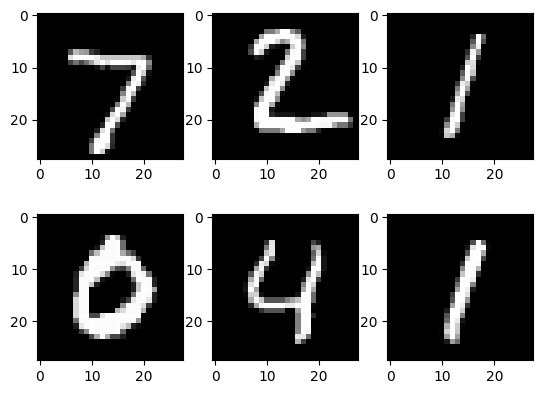

In [1]:
import torch
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader # optimized way to iter over the dataset
from torchvision import datasets
from torchvision.transforms import ToTensor # to transform images to tensors
import matplotlib.pyplot as plt

# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28*28pixels
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001 #1e-3
kernel_shapes = (3,3)
num_conv_filters = 32

# MNIST Dataset
train = datasets.MNIST(root='data', train=True, transform=ToTensor(), download=True)
test = datasets.MNIST(root='data', train=False, transform=ToTensor())

# Data Loader
train_loader = DataLoader(dataset=train, batch_size=batch_size, shuffle=True) # train and batch number
test_loader = DataLoader(dataset=test, batch_size=batch_size, shuffle=False) # train and batch number

# Images shape: 1,28,28
examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [33]:
# Fully Connected Neural Network
class ImageClassifier(nn.Module):
  def __init__(self, input_size=input_size, hidden_size=hidden_size, num_classes=num_classes): # can leave the args
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(1, num_conv_filters, kernel_size=kernel_shapes), # 1 because our pictures are black & white as our input channel, 32 filters(kernels) of shape 3by3
        nn.ReLU(), # activation function
        nn.Conv2d(num_conv_filters, num_conv_filters * 2, kernel_size=kernel_shapes), # 32 as our input channel, 32 filters(kernels) of shape 3by3
        nn.ReLU(),
        nn.Conv2d(num_conv_filters * 2, num_conv_filters * 2 , kernel_size=kernel_shapes), # 64 as our input channel, 32 filters(kernels) of shape 3by3
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(num_conv_filters*2*(28-6)*(28-6), hidden_size), # input is the output of the last layer multiplied by num of picture pixels minus the 2 pixels that each conv layer shave off from it,
        nn.ReLU(),
        nn.Linear(hidden_size, num_classes) # input is the output of the last layer as the output is number of classes that is 10
  )
  def forward(self,x): # must not contain no activation function layer or softmax layer
    return self.model(x)

In [23]:
# Instance of the neural network, loss, optimizer
model = ImageClassifier(input_size, hidden_size, num_classes).to(device)
# model = ImageClassifier().to('cuda')
loss_fn = nn.CrossEntropyLoss()
opt = Adam(model.parameters(), lr=learning_rate)

In [25]:
# Train the Model
if __name__ == '__main__':
  n_total_steps = len(train_loader)
  for epoch in range(num_epochs): # iterate over the epochs
    for i, batch in enumerate(train_loader):
      # if you move the model to the gpu make sure move the variables to it too
      img, label = batch # can be named X, y
      img  = img.to(device) # pushing the variable to the device
      label = label.to(device) # pushing the variable to the device

      # forward pass and loss calculation
      output = model(img) # can be named yhat
      loss = loss_fn(output, label)

      # backpropagation
      opt.zero_grad() # zero out any existing gradients
      loss.backward() # calculate gradients
      opt.step() # apply gradient descent

      if (i+1) % 100 == 0:
        print (f'Epoch: [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch: [1/10], Step [100/600], Loss: 0.0671
Epoch: [1/10], Step [200/600], Loss: 0.0319
Epoch: [1/10], Step [300/600], Loss: 0.0174
Epoch: [1/10], Step [400/600], Loss: 0.0168
Epoch: [1/10], Step [500/600], Loss: 0.0943
Epoch: [1/10], Step [600/600], Loss: 0.0111
Epoch: [2/10], Step [100/600], Loss: 0.0071
Epoch: [2/10], Step [200/600], Loss: 0.0126
Epoch: [2/10], Step [300/600], Loss: 0.0080
Epoch: [2/10], Step [400/600], Loss: 0.0583
Epoch: [2/10], Step [500/600], Loss: 0.0294
Epoch: [2/10], Step [600/600], Loss: 0.0348
Epoch: [3/10], Step [100/600], Loss: 0.0339
Epoch: [3/10], Step [200/600], Loss: 0.0328
Epoch: [3/10], Step [300/600], Loss: 0.0032
Epoch: [3/10], Step [400/600], Loss: 0.0647
Epoch: [3/10], Step [500/600], Loss: 0.0448
Epoch: [3/10], Step [600/600], Loss: 0.0656
Epoch: [4/10], Step [100/600], Loss: 0.0004
Epoch: [4/10], Step [200/600], Loss: 0.0001
Epoch: [4/10], Step [300/600], Loss: 0.0023
Epoch: [4/10], Step [400/600], Loss: 0.0078
Epoch: [4/10], Step [500/600], L

In [27]:
# Test the Model CAREFUL: NO GRADIENT!
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader: # iterate over the test loader
        images = images.to(device) # make sure to push to gpu
        labels = labels.to(device) # make sure to push to gpu

        outputs = model(images)

        # max returns (output_value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test images: {100*acc} %')

Accuracy of the network on the 10000 test images: 98.74000000000001 %


In [29]:
# Save Model
with open('pytorch_basics_model_state.pt', 'wb') as f:
  save(model.state_dict(), f)

tensor(2, device='cuda:0')
Accuracy of the model: 98.74 %
Accuracy of the loaded model: 98.74 %


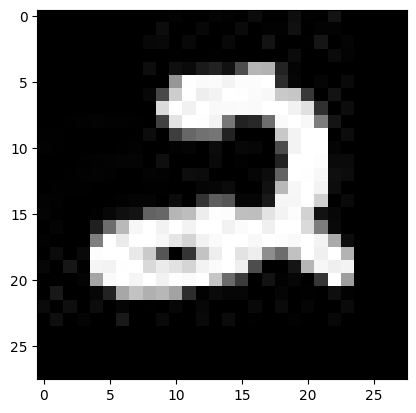

In [41]:
# Load Weights
loaded_model = ImageClassifier()
with open('model_state.pt', 'rb') as f:
    loaded_model.load_state_dict(torch.load(f))
loaded_model.to(device)
loaded_model.eval()
# Testing:
from PIL import Image

img = Image.open('pytorch_basics_img_1.jpg')
plt.imshow(img, cmap='gray')
img_tensor = ToTensor()(img).unsqueeze(0).to(device)

print(torch.argmax(loaded_model(img_tensor)))

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the model: {acc} %')

    acc = 100.0 * n_correct2 / n_samples
    print(f'Accuracy of the loaded model: {acc} %')

### 5 CIFAR dataset

Files already downloaded and verified
Files already downloaded and verified


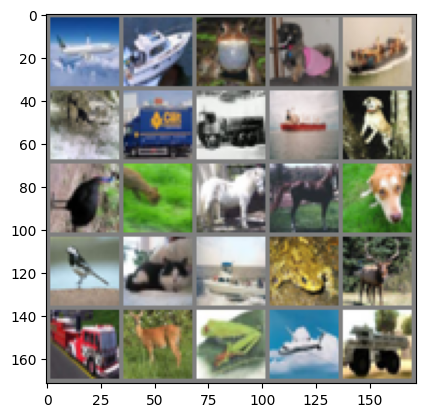

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader # optimized way to iter over the dataset
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001 #1e-3
kernel_shapes = 3
num_conv_filters = 32

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # (mean, standard-deviation) for all the 3 color channels

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = datasets.CIFAR10(root='./data',
                                 train=True,
                                 download=True,
                                 transform=transform)

test_dataset = datasets.CIFAR10(root='./data',
                                train=False,
                                download=True,
                                transform=transform)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Dataset classes
def imshow(imgs):
    imgs = imgs / 2 + 0.5   # unnormalize
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)

In [45]:
# Neural network
class ConvNet(nn.Module):
    def __init__(self): # defining the layers
        # using self variables
        super().__init__()
        self.conv1 = nn.Conv2d(3, num_conv_filters, kernel_shapes) # 3 because our pictures have 3 color channels
        self.pool = nn.MaxPool2d(2, 2) # reduces the image size
        self.conv2 = nn.Conv2d(num_conv_filters, num_conv_filters*2, kernel_shapes)
        self.conv3 = nn.Conv2d(num_conv_filters*2, num_conv_filters*2, kernel_shapes)
        self.fc1 = nn.Linear(num_conv_filters*2*4*4, 64) # input shape is from output of all the above layers
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x): # applying the layers
        # N, 3, 32, 32 -> batch_size, 3 color channels, 32*32 pixels

        # applying the activation function directly
        x = F.relu(self.conv1(x))   # x.shape -> N, 32, 30, 30
        x = self.pool(x)            # " -> N, 32, 15, 15
        x = F.relu(self.conv2(x))   # " -> N, 64, 13, 13
        x = self.pool(x)            # " -> N, 64, 6, 6
        x = F.relu(self.conv3(x))   # " -> N, 64, 4, 4 -> input shape for linear layer
        x = torch.flatten(x, 1)     # " -> N, 1024
        x = F.relu(self.fc1(x))     # " -> N, 64
        x = self.fc2(x)             # " -> N, 10
        return x

# Model instance
model = ConvNet().to(device)

# loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

# Training the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    running_loss = 0.0 # to calculate the average loss in each epoch
    for i, (images, labels) in enumerate(train_loader):
        # pushing to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad() # before each iteration make sure to empty the gradient
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

print('Finished Training')

# Saving the model
PATH = './cnn.pth' # .pth common file for pytorch model
torch.save(model.state_dict(), PATH) # save only with the train parameters
# torch.save(model, PATH)

[1] loss: 1.585
[2] loss: 1.241
[3] loss: 1.066
[4] loss: 0.947
[5] loss: 0.859
[6] loss: 0.793
[7] loss: 0.733
[8] loss: 0.684
[9] loss: 0.636
[10] loss: 0.602
Finished Training


In [46]:
# Load the model
# when we saved only the state_dict we need to make a new model instance
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the path file itself
loaded_model.to(device)
loaded_model.eval() # internal configuration better for the evaluation not the training

# Testing the model CAREFUL: NO GRADIENTS WHILE testing
with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        # model from previous step of saving
        outputs = model(images)

        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

        # model from after the step of saving
        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the model: {acc} %')

    acc = 100.0 * n_correct2 / n_samples
    print(f'Accuracy of the loaded model: {acc} %')

Accuracy of the model: 73.21 %
Accuracy of the loaded model: 73.21 %
